# Redes Perceptron

* 1958 - Rosenblatt
* Alimentação adiante
* Neurônio artificial

<img src="images/perceptron.png">

<img src="images/activation.png">

In [1]:
import numpy as np
import matplotlib.pyplot as plt

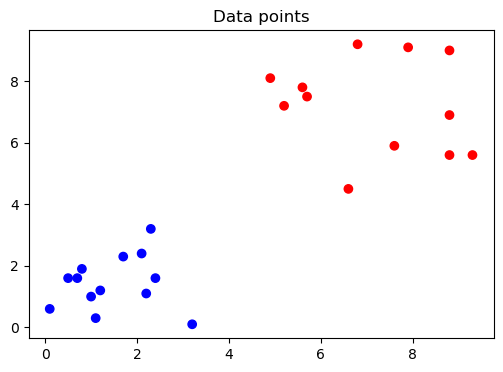

In [ ]:
# Dataset
x = np.array([[1.0, 1.0], [2.1, 2.4], [1.1, 0.3], [2.3, 3.2], [0.1, 0.6],
              [0.5, 1.6], [1.7, 2.3], [0.7, 1.6], [3.2, 0.1], [2.2, 1.1],
              [0.8, 1.9], [2.4, 1.6], [1.2, 1.2], [5.2, 7.2], [6.6, 4.5],
              [4.9, 8.1], [7.6, 5.9], [8.8, 9.0], [5.6, 7.8], [8.8, 5.6],
              [7.9, 9.1], [6.8, 9.2], [8.8, 6.9], [9.3, 5.6], [5.7, 7.5]
             ])

d = np.array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

plt.figure(figsize=(6,4))
plt.title("Pontos de Dados")
plt.scatter(x[:, 0], x[:, 1], c = d, cmap = 'bwr')
plt.show()

In [18]:
class Perceptron:
    # Construtor, define taxa de aprendizado e número máximo de épocas
    def __init__(self, lr, n_epochs):
        self.lr = lr
        self.n_epochs = n_epochs
    
    # 1 se value > 0, -1 se value < 0, 0 se value == 0 
    def activation(self, value):
        return (1 if value > 0 else -1 if value < 0 else 0)
    
    # Multiplicação matricial entre as entradas e os pesos somado ao bias proporcional
    def predict(self, x):
        return np.dot(x, self.weights.T) + self.bias * self.w_bias
        
    # Calcula a diferença entre o valor real e o valor predito
    def evaluate(self, target, predicted):
        return (target - predicted)
    
    # Treinamento do perceptron
    def train(self, x, d):
        # Definir aleatoriamente os pesos, o bias e o peso do bias
        self.weights = np.random.random(x.shape[1])
        self.bias = np.random.random()
        self.w_bias = np.random.random()

        epoch = 0
        is_error = True
        self.total_error = []
      
        #Enquanto houver erro, ou o máximo de épocas não for atingido continua o processo
        while is_error and epoch < self.n_epochs:
            is_error = False
            epoch_errors = 0

            for xi, target in zip(x, d):
                predicted = self.predict(xi)
                predicted = self.activation(predicted)
                current_error = self.evaluate(target, predicted)
                epoch_errors += current_error

                if predicted != target:
                    self.weights += self.lr * current_error * xi
                    self.w_bias += self.lr * current_error * self.bias
                    is_error = True

            self.total_error.append(epoch_errors/len(x))
            epoch += 1
        
    # Dado uma lista de X, submete-os à rede    
    def test(self, x):
        results = []

        for xi in x:
            predict = self.predict(xi)
            predict = self.activation(predict)
            results.append(predict)

        return results

In [19]:
p = Perceptron(lr=0.1 , n_epochs=100)
p.train(x=x, d=d)

In [20]:
x_teste = np.array([[1, 4], [3, 1], [3, 2], [5, 5], [6, 7], [4, 8]])

teste_resultado = p.test(x_teste)
teste_resultado

[-1, -1, -1, 1, 1, 1]

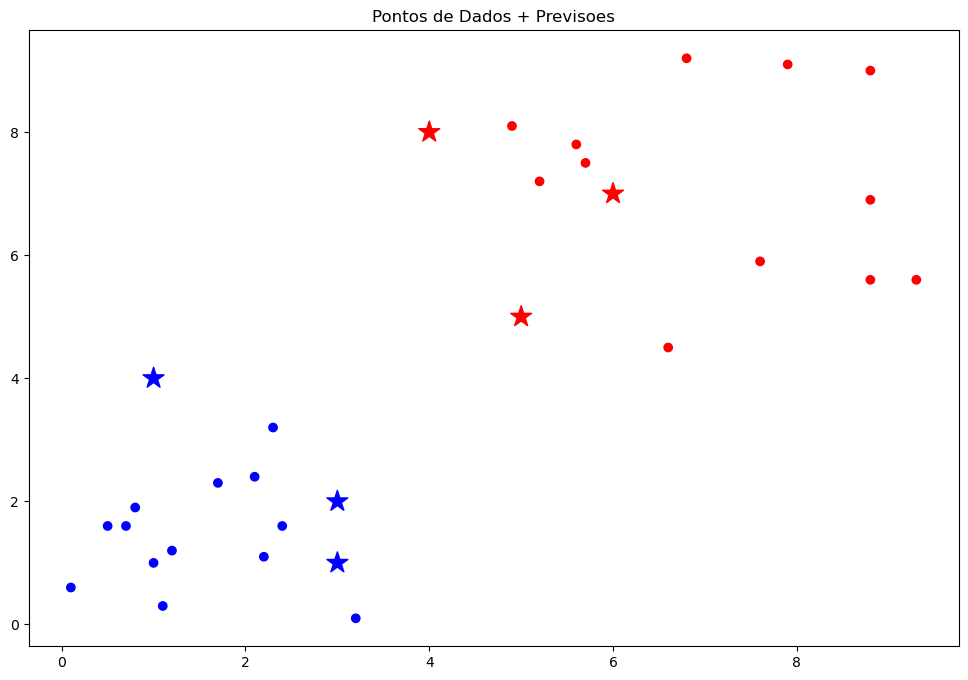

In [23]:
plt.figure(figsize=(12,8))
plt.title("Pontos de Dados + Previsoes")
plt.scatter(x[:, 0], x[:, 1], c = d, cmap = 'bwr')
plt.scatter(x_teste[:, 0], x_teste[:, 1], c = teste_resultado, cmap = 'bwr', marker = "*", s=250)
plt.show()

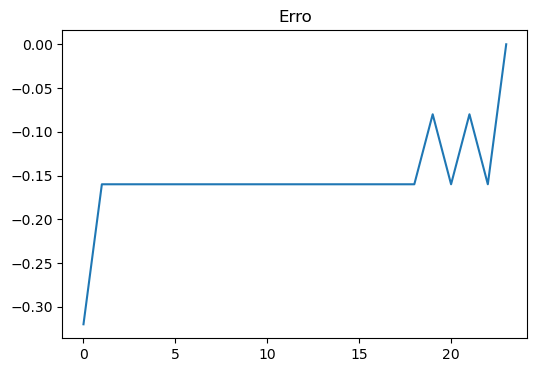

In [24]:
plt.figure(figsize=(6,4))
plt.title("Erro")
plt.plot(p.total_error)
plt.show()

In [ ]:
#self.weights = np.array([0.5, 0.7])
#self.bias = -1
#self.w_bias = 0.1
#x = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
#d = np.array([-1,1,1,1])